In [1]:
import numpy as np
import sympy as sp
from fractions import Fraction as frac
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter, FormatStrFormatter
import matplotlib.ticker as tck
import pandas as pd


from qbstyles import mpl_style

mpl_style(dark=False)

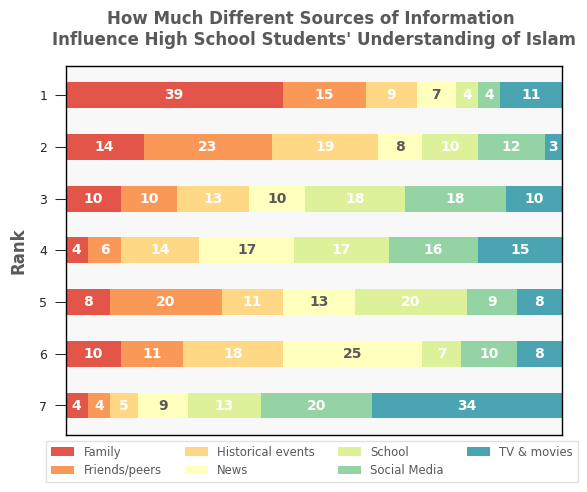

In [169]:
import numpy as np
import sympy as sp
from fractions import Fraction as frac
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter, FormatStrFormatter
import matplotlib.ticker as tck
import pandas as pd


from qbstyles import mpl_style

mpl_style(dark=False)


# open responses.csv with pandas

df = pd.read_csv('responses.csv')

# get rid of rows after 90
df = df.iloc[:89]

# show columns 10-17
data = df.iloc[:, 9:16]


data_dict = {i : data.T.iloc[i].value_counts().sort_index().to_dict() for i in range(7)}
# make a bar chart where the x axis are the 7 data dictionaries and the y axis are stacked bars

def plot_bar(data_dict):
    fig, ax = plt.subplots()
    fig.delaxes(fig.axes[0])

    ranks = ['1', '2', '3', '4', '5', '6', '7']

    # make a numbers dictionary where the keys are the strings and the values are arrays of the number of times for each rank
    numbers = {list(data_dict[i].keys())[i]: np.array([list(data_dict[j].values())[i] for j in range(7)]) for i in range(7)}


    x_values = range(0, len(ranks)*3,3)

    bottom = np.zeros(len(ranks))
    
    labels = [i+1 for i in data_dict.keys()]
    values = np.array([list(data_dict[i].values()) for i in range(7)]).T

    
    # make total values for each rank equal 89
    for i in range(7):
        values[i][-1] = values[i][-1]-(values[i].sum()-89)
        # values_cum[i][-1] = 89
    values_cum = np.cumsum(values, axis=1)
    
    
    rank_colours = plt.colormaps['Spectral'](
        np.linspace(0.15, 0.85, data.shape[1]))
    
    
    for i, (colname, colour) in enumerate(zip(ranks, rank_colours)):
        widths = values[:, i]
        starts = values_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=colour)

        r, g, b, _ = colour
        text_colour = 'white' if r * g * b < 0.5 else '#595959'
        ax.bar_label(rects, label_type='center', color=text_colour, weight='bold')

    ax.invert_yaxis()

    ax.set_xticks(x_values)
    ax.set_xticklabels(ranks)
    ax.set_ylabel('Rank', color='#595959', weight='bold')
    ax.yaxis.set_minor_locator(tck.NullLocator())
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, 89)

    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
        
    
    ax.set_title('How Much Different Sources of Information \nInfluence High School Students\' Understanding of Islam', color='#595959', weight='bold')
    ax.legend(list(data_dict[0].keys()),
        ncols=len(data_dict[0])/2+1, bbox_to_anchor=(-0.05, 0), loc='upper left', fontsize='small', labelcolor='#595959')
    ax.grid(False)

    fig.patch.set_facecolor('white')


plot_bar(data_dict)
plt.show()

In [85]:
y = sp.symbols('y')
x = sp.symbols('x')
R = ((x+1)**2) / 9 - ((y-2)**2) / 4

sol = sp.solve(sp.Eq(R, 1), y)

f = sp.lambdify(x, sol[0])
g = sp.lambdify(x, sol[1])

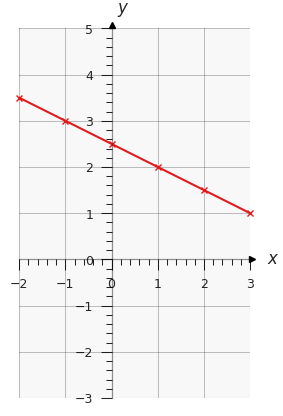

In [3]:
fig, ax = plt.subplots()
fig.delaxes(fig.axes[0])

ax.plot()

ax.set_xlim(-2, 3)
ax.set_ylim(-3, 5)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

ax.xaxis.set_major_locator(MultipleLocator(1))

# # have whole number tick labels not have .0
# ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
# # have grid for x axis at every 0.5 but only display every 2nd
# for label in ax.xaxis.get_ticklabels()[::2]:
#     label.set_visible(False)

ax.yaxis.set_major_locator(MultipleLocator(1))

# make aspect ratio 1:2
ax.set_aspect('equal')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)

# ax.xaxis.set_label_coords(1.05, 0.5)
ax.xaxis.set_label_coords(1.1, 0.4)
# ax.yaxis.set_label_coords(0.5, 1.025)
ax.yaxis.set_label_coords(0.45, 1.025)

# make axis have arrows
ax.plot((1.009), (0), ls="", marker=">", ms=5, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1.009), ls="", marker="^", ms=5, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)


# ax.plot(-2, -5, marker='x', ms=5, color='#E31A1C', clip_on=False)
# ax.plot(-1, -2, marker='x', ms=5, color='#E31A1C', clip_on=False)
# ax.plot(0, 1, marker='x', ms=5, color='#E31A1C', clip_on=False)
# ax.plot(1, 4, marker='x', ms=5, color='#E31A1C', clip_on=False)
# ax.plot(2, 7, marker='x', ms=5, color='#E31A1C', clip_on=False)
# ax.plot(3, 10, marker='x', ms=5, color='#E31A1C', clip_on=False)

x = np.linspace(-5, 5, 100)
y = (5-x)/2

for i in range(-2, 4):
    ax.plot(i, (5-i)/2, marker='x', ms=5, color='#E31A1C', clip_on=False)

ax.plot(x, y)

# ax.plot((-1.5,-1.5),(0,-3.5), color='#1F78B4', linestyle='--')
# ax.plot((-1.5,0),(-3.5,-3.5), color='#1F78B4', linestyle='--')
# ax.plot(-1.5, -3.5, marker='x', ms=5, color='#1F78B4', clip_on=False)

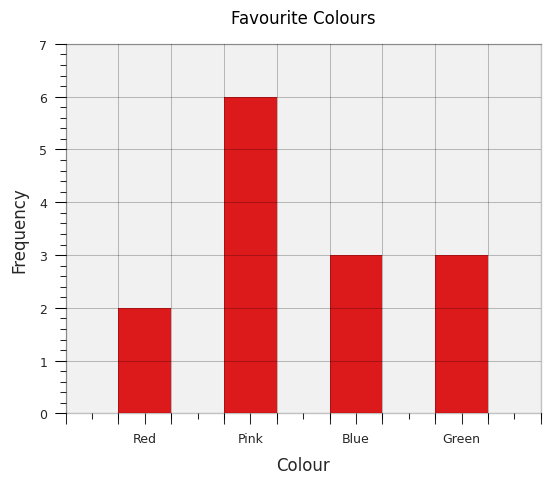

In [161]:
fig, ax = plt.subplots()
fig.delaxes(fig.axes[0])

data = {'Red': 2, 'Pink': 6, 'Blue': 3, 'Green': 3}

x_values = range(0, len(data)*2,2)

ax.bar(x_values, data.values(), width=1)
ax.set_xlabel('Colour')
ax.set_ylabel('Frequency')
ax.set_xlim(-1.5, 7.5)
ax.set_ylim(0, 7)

ax.set_xticks([x for x in x_values])
ax.set_xticklabels(data.keys())


ax.set_title('Favourite Colours')
ax.set_aspect('equal')
ax.grid()


ax2 = fig.add_subplot(111)
ax2.set_xlim(-1, 8)
ax2.set_ylim(0, 7)
ax2.set_aspect('equal')
ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax2.spines['left'].set_color('none')
ax2.spines['right'].set_color('none')


plt.show()

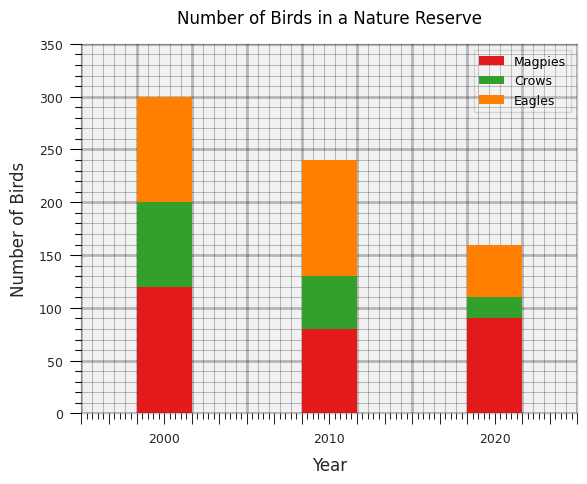

In [265]:
fig, ax = plt.subplots()
fig.delaxes(fig.axes[0])

years = ['2000', '2010', '2020']
numbers = {
    'Magpies': np.array([120, 80, 90]),
    'Crows': np.array([80, 50, 20]),
    'Eagles': np.array([100, 110, 50])
}

x_values = range(0, len(years)*3,3)

bottom = np.zeros(len(years))

for bird, num in numbers.items():
    p = ax.bar(x_values, num, 1, label=bird, bottom=bottom)
    bottom += num


ax.set_xlabel('Year')
ax.set_ylabel('Number of Birds')
ax.set_xlim(-1.5, 7.5)
ax.set_ylim(0, 350)

ax.set_xticks([x for x in x_values])
ax.set_xticklabels(data.keys())

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.set_aspect('auto')

ax.set_title('Number of Birds in a Nature Reserve')
ax.grid()
ax.legend(loc='upper right').set_zorder(1)

ax2 = fig.add_subplot(111)
ax2.set_xlim(-1, 8)
ax2.set_ylim(0, 350)
ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax2.spines['left'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.xaxis.set_minor_locator(MultipleLocator(0.2))
ax2.yaxis.set_major_locator(MultipleLocator(50))
ax2.yaxis.set_minor_locator(MultipleLocator(10))
ax2.set_aspect('auto')
ax2.grid(which='minor')
ax2.grid(which='major', color='k', linestyle='-', linewidth=2)

ax.set_zorder(1)

plt.show()

In [ ]:
'#1F78B4'
, color='#E31A1C'
'#33A02C'

In [124]:
def pi_axis_formatter(val, pos, denomlim=10, pi=r'\pi'):
    """
    format label properly
    for example: 0.6666 pi --> 2π/3
               : 0      pi --> 0
               : 0.50   pi --> π/2  
    """
    minus = "-" if val < 0 else ""
    val = abs(val)
    ratio = frac(val/np.pi).limit_denominator(denomlim)
    n, d = ratio.numerator, ratio.denominator
    
    fmt2 = "%s" % d 
    if n == 0:
        fmt1 = "0"
    elif n == 1:
        fmt1 = pi
    else:
        fmt1 = r"%s%s" % (n,pi)
        
    fmtstring = "$" + minus + (fmt1 if d == 1 else r"\frac{%s}{%s}" % (fmt1, fmt2)) + "$"
    
    return fmtstring

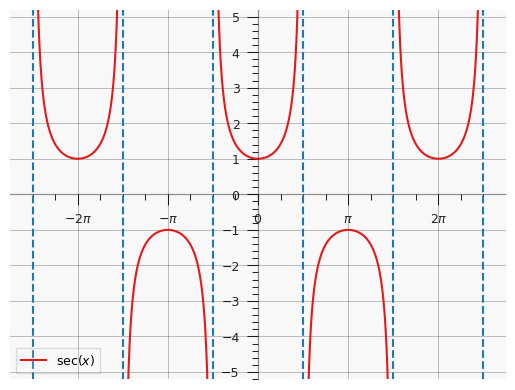

In [164]:
x = np.linspace(-5*np.pi/2, 5*np.pi/2, 10000)
y = 1/np.cos(x)

# Insert NaN where the difference between consecutive y values is greater than 1
# This is to prevent the line from connecting the asymptotes
y[np.where(np.diff(y) > 1)] = np.nan


fig, ax = plt.subplots()
fig.delaxes(fig.axes[0])

line1, = plt.plot(x, y)
# line2, = plt.plot(x, g(x))

asymptote_lines = plt.vlines([-5*np.pi/2, -3*np.pi/2, -np.pi/2, np.pi/2, 3*np.pi/2, 5*np.pi/2], -10.5, 10.5, color='#1F78B4', linestyle='--')

# asymptote1, = plt.plot(x, 2/3*(x+1) + 2, color='#1F78B4', linestyle='--')
# asymptote2, = plt.plot(x, -2/3*(x+1) + 2, color='#1F78B4', linestyle='--')


# have axis going through origin with spines
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# ax.set_xlim([-2.3, 10])
ax.set_ylim([-5.2, 5.2])


# make tick labels multiples of pi
ax.xaxis.set_major_formatter(FuncFormatter(pi_axis_formatter))

# make ticks every integer
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.yaxis.set_major_locator(MultipleLocator(1))

# ax.set_aspect('equal')  # make x and y ticks the same width apart

plt.legend([r'$\sec(x)$'], loc='lower left')


plt.savefig('graph_15.png', dpi=1000)

In [3]:
from scipy.signal import argrelextrema

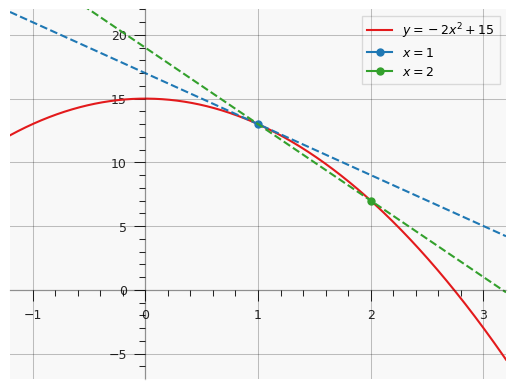

In [25]:
x = np.linspace(-2, 4, 10000)

# make y some cubic function
y = -2*x**2 + 15


fig, ax = plt.subplots()
fig.delaxes(fig.axes[0])

line1, = plt.plot(x, y)


# have axis going through origin with spines
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')


# find id of x value closest to 1
id = np.argmin(np.abs(x - 1))

# plot point where x=3
ax.plot(1, y[id], marker='o', ms=5, color='#1F78B4', clip_on=False)
id2 = np.argmin(np.abs(x - 2))
ax.plot(2, y[id2], marker='o', ms=5, color='#33A02C', clip_on=False)


dydx = np.gradient(y, x)

line2, = ax.plot(x, dydx[id]*(x-1) + y[id], color='#1F78B4', linestyle='--')

# line that passes through (1,13) and (2,7)
line3, = ax.plot(x, ((7-13)/(2-1))*(x-1)+13, linestyle='--')



ax.set_xlim(-1.2, 3.2)
ax.set_ylim(-7, 22)

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))

ax.set_aspect('auto')


ax.legend([r'$y=-2x^2+15$', r'$x=1$', r'$x=2$'], loc="upper right")

plt.savefig('tangent_lines_2.png', dpi=1000)

C:\Users\Owner\AppData\Local\Temp\ipykernel_8284\1468627237.py:2: RuntimeWarning: divide by zero encountered in divide
  y = (x**2+4*x-12)/(x**2-2*x)


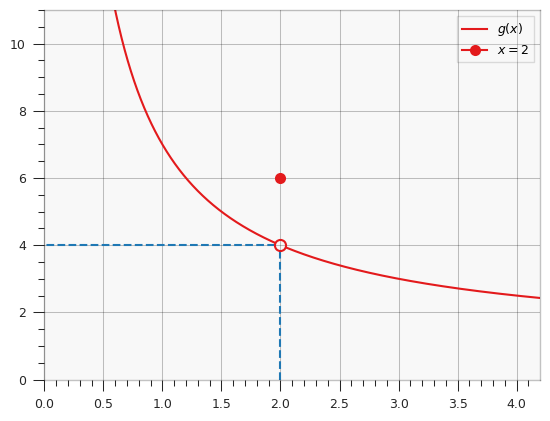

In [9]:
x = np.linspace(0, 5, 100000)
y = (x**2+4*x-12)/(x**2-2*x)

fig, ax = plt.subplots()
fig.delaxes(fig.axes[0])



mask1 = x < 1.95
mask2 = x > 2.05

x_n1 = x[mask1]
y_n1 = y[mask1]

x_n2 = x[mask2]
y_n2 = y[mask2]

ax.plot(x_n1, y_n1, color='#E31A1C', label=r'$g(x)$')
ax.plot(x_n2, y_n2 , color='#E31A1C')

ax.set_xlim(0, 4.2)
ax.set_ylim(0, 11)


ax.plot((2, 2), (0, 3.8), color='#1F78B4', linestyle='--')
ax.plot((1.95, 0), (4, 4), color='#1F78B4', linestyle='--')

# show hole at x=2
ax.plot(2, y[np.argmin(np.abs(x - 2))], marker='o', fillstyle='none', markersize=8, markeredgewidth=1.5, color='#E31A1C')
ax.plot(2, 6,  label=r'$x=2$', marker='o', color='#E31A1C', markersize=8, markeredgewidth=0)

ax.set_aspect('auto')

ax.legend(loc='upper right')

plt.savefig('limits_2.png', dpi=1000)

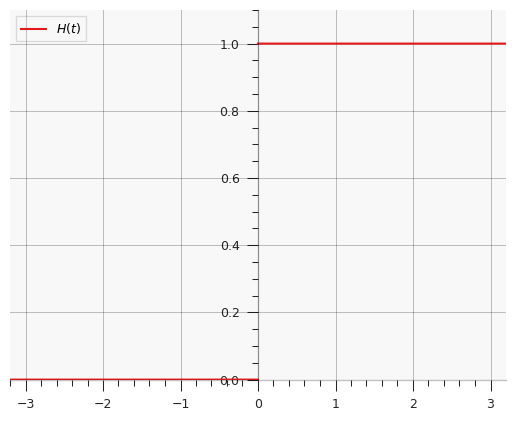

In [29]:
t = np.linspace(-4, 4, 100000)
y = np.piecewise(t, [t<0, t>=0], [0, 1])

# insert NaN where it goes from 0 to 1
y[np.where(np.diff(y) > 0)] = np.nan

fig, ax = plt.subplots()
fig.delaxes(fig.axes[0])

ax.plot(t, y, label=r'$H(t)$')

ax.set_xlim(-3.2, 3.2)
ax.set_ylim(0, 1.1)

# have axis going through origin with spines
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

ax.set_aspect('auto')

ax.legend(loc='upper left')

plt.savefig('limits_4.png', dpi=1000)

In [81]:
class Trithemius:
    def __init__(self, plaintext: str, start: int=1, ascending: bool=True) -> None:
        self.letters_dict: dict[str, int] = {
            'A': 1,
            'B': 2,
            'C': 3,
            'D': 4,
            'E': 5,
            'F': 6,
            'G': 7,
            'H': 8,
            'I': 9,
            'J': 10,
            'K': 11,
            'L': 12,
            'M': 13,
            'N': 14,
            'O': 15,
            'P': 16,
            'Q': 17,
            'R': 18,
            'S': 19,
            'T': 20,
            'U': 21,
            'V': 22,
            'W': 23,
            'X': 24,
            'Y': 25,
            'Z': 0
        }
        self.plaintext: str = plaintext
        self.ascending: bool = ascending
        if self.ascending:
            self.start: int = start
            self.multi = 1
        else:
            self.start: int = -start
            self.multi = -1
        
    def encrypt(self) -> str:
        '''
        e.g. TEST --> UGVX (1; Ascending)
        1) Encrypting First Letter:
            a) T --> 20
            b) (20 + 1 + 0) % 26 = 21
            c) 21 --> U
        2) ...
        ⋮
        Encryption Complete
        '''
        
        encrypted = ''
        for index, letter in enumerate(self.plaintext):
            num = self.letters_dict.get(letter)
            new_num = (num + self.start + index*self.multi) % 26
            new_letter = list(self.letters_dict.keys())[list(self.letters_dict.values()).index(new_num)]
            encrypted += new_letter
        
        return encrypted
    
    def decrypt(self):
        '''
        e.g. UGVX --> TEST (1; Ascending)
        1) Decrypting First Letter:
            a) U --> 21
            b) (21 - 1 - 0) % 26 = 20
            c) 20 --> T
        2) ...
        ⋮
        Decryption Complete
        '''
        
        decrypted = ''
        for index, letter in enumerate(self.plaintext):
            num = self.letters_dict.get(letter)
            new_num = (num - self.start - index*self.multi) % 26
            new_letter = list(self.letters_dict.keys())[list(self.letters_dict.values()).index(new_num)]
            decrypted += new_letter
        
        return decrypted

In [85]:
test = Trithemius('ABDUL')
test.encrypt()

'BDGYQ'